# Installation of required libraries and basic setup

In [1]:
!pip install tensorflow

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [4]:
# from google.colab import drive
# drive.mount("/content/gdrive")

# # from google.colab import auth
# # auth.authenticate_user()

In [5]:
import os
os.chdir(r'/kaggle/input/landslide4sense')

# Testing the dataset 

In [6]:
# Testing the dataset 
path_single = r"/kaggle/input/landslide4sense/TrainData/TrainData/img/image_1000.h5"
path_single_mask = r'/kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_1000.h5'

ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


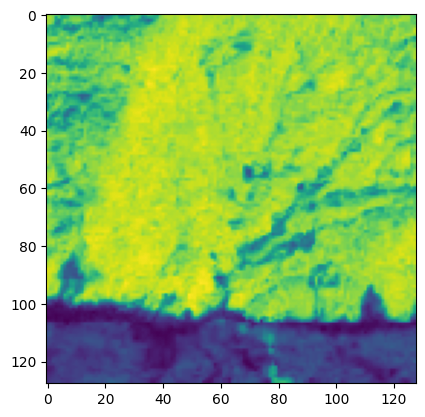

In [7]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


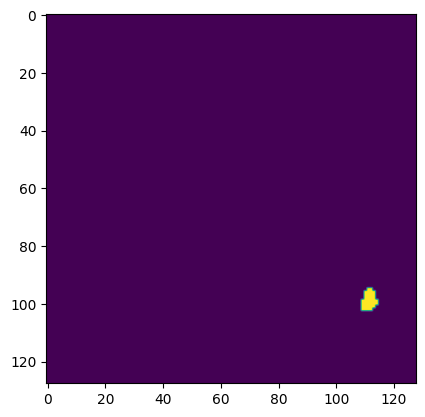

In [8]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

# Using all dataset

In [9]:
path_single = r"/kaggle/input/landslide4sense/TrainData/TrainData/img/image_10.h5"
path_single_mask = r'/kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_1.h5'
TRAIN_PATH = r"/kaggle/input/landslide4sense/TrainData/TrainData/img/*.h5"
TRAIN_MASK = r'/kaggle/input/landslide4sense/TrainData/TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

## Train with RGB, NDVI, DEM, and Slope 


In [10]:
#testing for google colab GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [11]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_1.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_1.h5
1 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_10.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_10.h5
2 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_100.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_100.h5
3 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_1000.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_1000.h5
4 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_1001.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_1001.h5
5 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_1002.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_1002.h5
6 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_1003.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_1003.h5
7 /kaggle/input/landslide4sense/TrainData/Trai

/tmp/ipykernel_36/3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1671 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_2502.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_2502.h5
1672 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_2503.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_2503.h5
1673 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_2504.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_2504.h5
1674 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_2505.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_2505.h5
1675 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_2506.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_2506.h5
1676 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_2507.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_2507.h5
1677 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_2508.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_2508.h5
1678 /kaggle/

/tmp/ipykernel_36/3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2265 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_3037.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_3037.h5
2266 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_3038.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_3038.h5
2267 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_3039.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_3039.h5
2268 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_304.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_304.h5
2269 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_3040.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_3040.h5
2270 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_3041.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_3041.h5
2271 /kaggle/input/landslide4sense/TrainData/TrainData/img/image_3042.h5 /kaggle/input/landslide4sense/TrainData/TrainData/mask/mask_3042.h5
2272 /kaggle/in

## Testing min, max values in train data

In [12]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


## Custom loss function (Dice Loss)

In [13]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

## Visualization of the training data

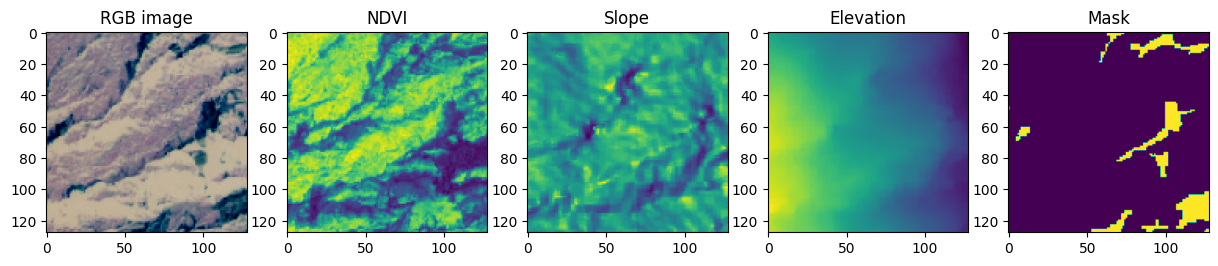

In [14]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

## Validation split

In [15]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

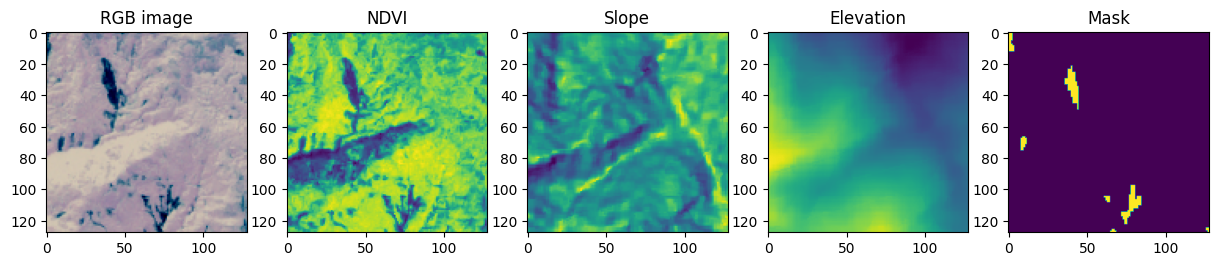

In [16]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [17]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [18]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

# Model 


In [19]:
#Primary
import tensorflow as tf

# Define custom metrics
def recall_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# Define your U-Net model
def unet_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model


# Model Training

In [ ]:
model = unet_model(128, 128, 6)
# Change the file path to a writable directory
checkpointer = tf.keras.callbacks.ModelCheckpoint("/kaggle/working/best_model.keras", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")

callbacks = [
    checkpointer
]

history = model.fit(x_train, y_train, batch_size=16,  
          epochs=50, 
          verbose=2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

# Save the final model to a writable directory
model.save("/kaggle/working/model_save.keras")


In [21]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.033105649054050446 0.9886742830276489 0.6725811958312988 0.8240322470664978 0.5739453434944153


# Prediction

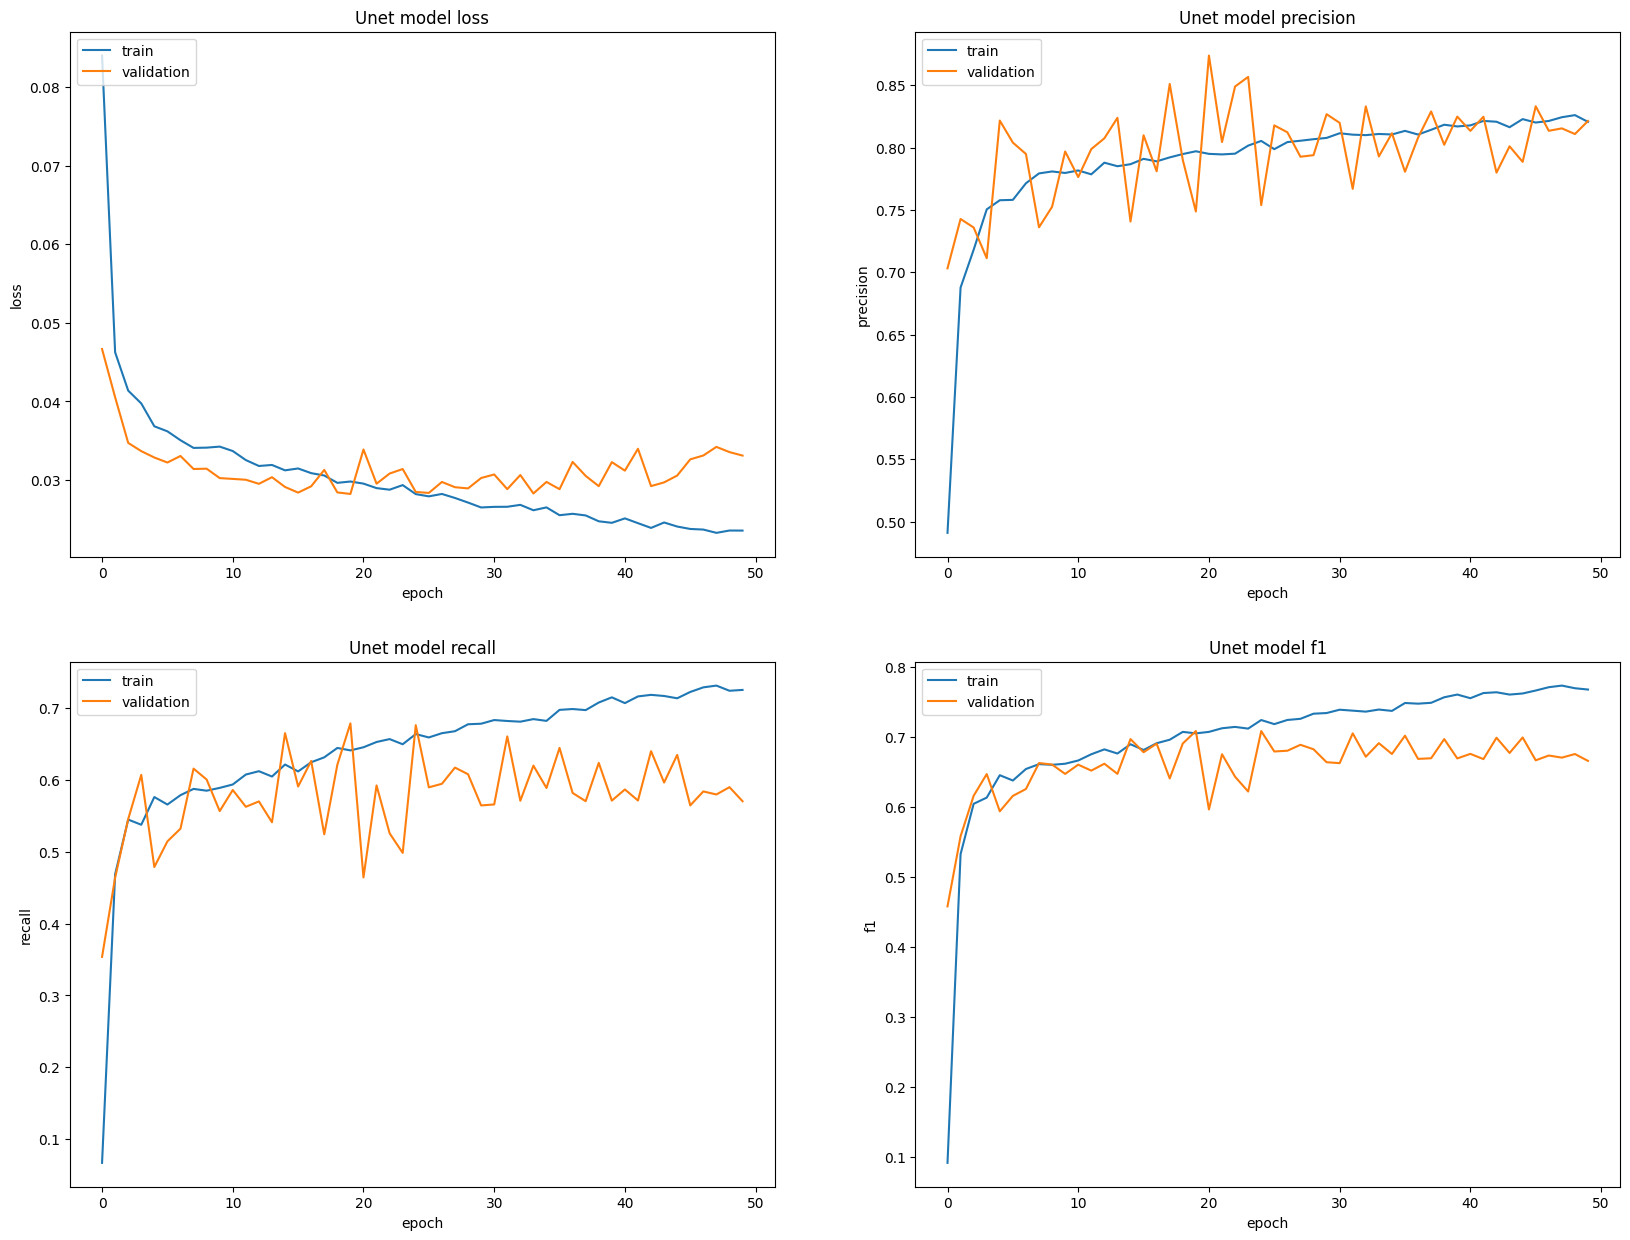

In [22]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [23]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


Text(0.5, 1.0, 'Training Image')

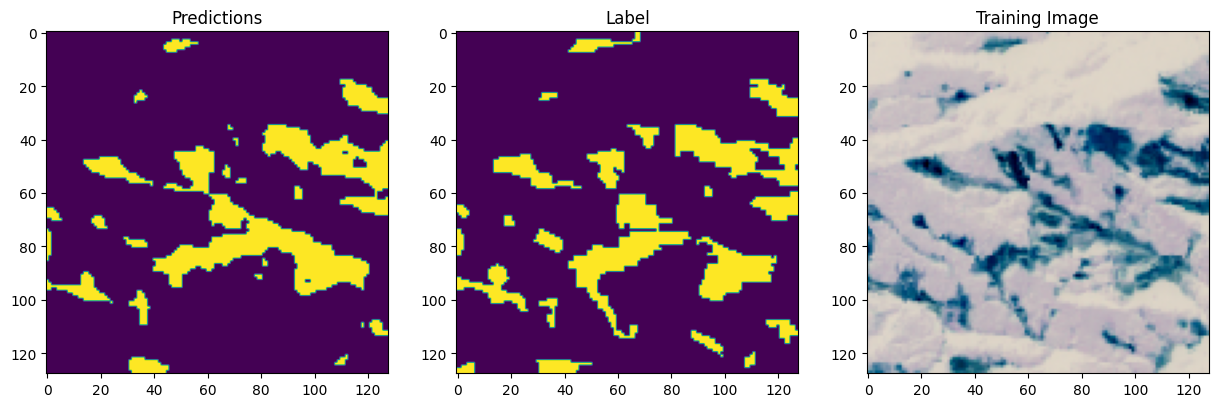

In [24]:
img = 160
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

Text(0.5, 1.0, 'Training Image')

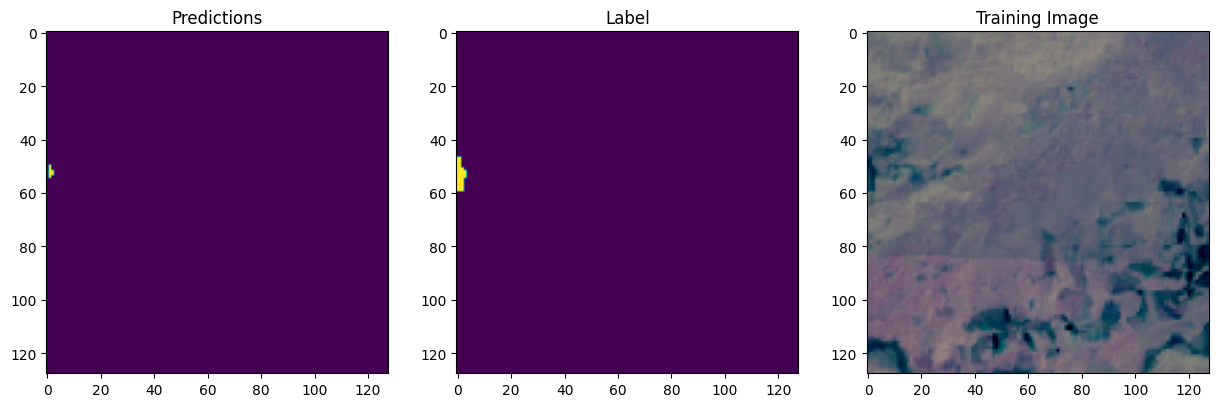

In [25]:
img = 188
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

Text(0.5, 1.0, 'Training Image')

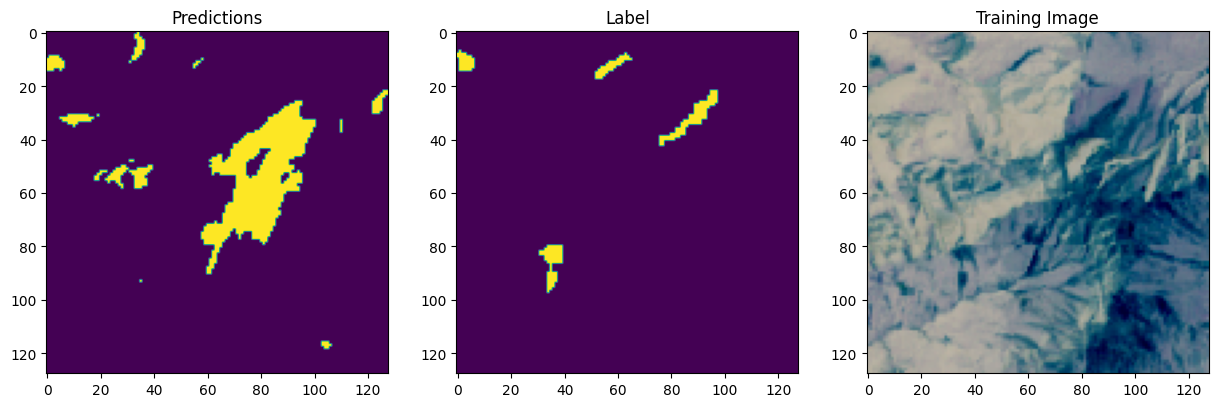

In [26]:
img = 170
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

# Validation data 

In [29]:
validation_url = r'/kaggle/input/landslide4sense/ValidData/ValidData/img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_1.h5
1 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_10.h5
2 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_100.h5
3 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_101.h5
4 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_102.h5
5 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_103.h5
6 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_104.h5
7 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_105.h5
8 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_106.h5
9 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_107.h5
10 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_108.h5
11 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_109.h5
12 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_11.h5
13 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_110.h5
14 /kaggle/input/landslide4sense/V

/tmp/ipykernel_37/1862862515.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


164 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_26.h5
165 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_27.h5
166 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_28.h5
167 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_29.h5
168 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_3.h5
169 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_30.h5
170 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_31.h5
171 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_32.h5
172 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_33.h5
173 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_34.h5
174 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_35.h5
175 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_36.h5
176 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_37.h5
177 /kaggle/input/landslide4sense/ValidData/ValidData/img/image_38.h5
178 /kaggle/input/lan

## Prediction for validation data

In [30]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step


(245, 128, 128, 1)

## Visualization of validation image

Text(0.5, 1.0, 'Training Image')

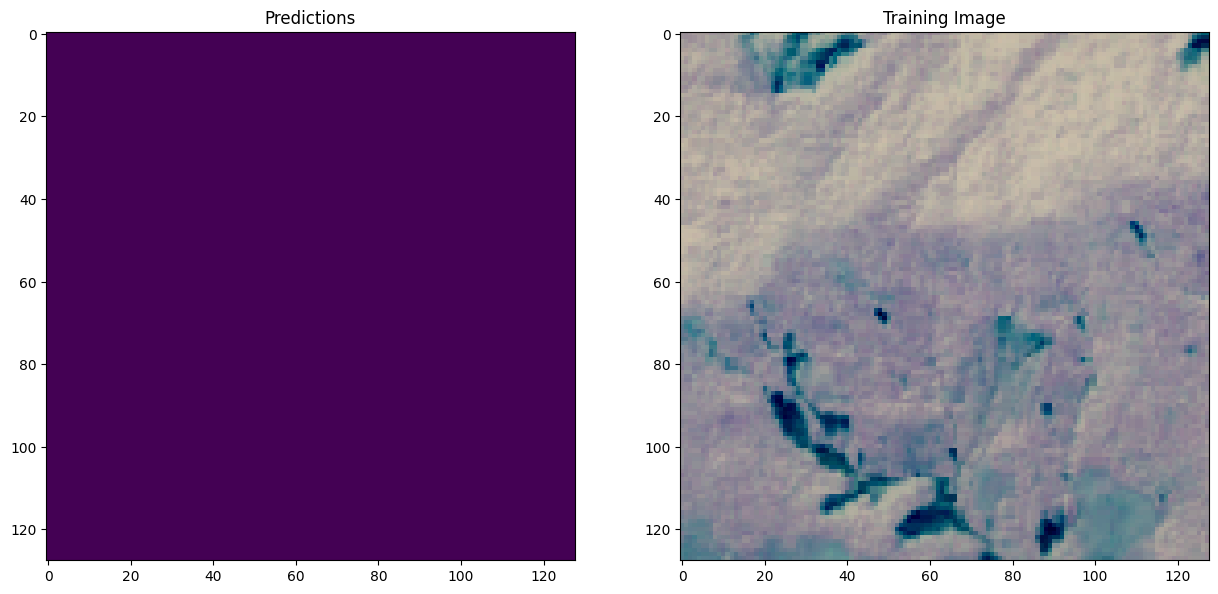

In [31]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [32]:
import os
import h5py

# Define the directory for saving masks in Kaggle
write_directory = '/kaggle/working/validation_masks/'

# Ensure the directory exists, create if not
os.makedirs(write_directory, exist_ok=True)

# Loop over masks and save them
for i, name in enumerate(mask_name):
    h5f = h5py.File(os.path.join(write_directory, name), 'w')
    
    # Adjust the dimension of the prediction to (n, 128, 128)
    pred_mask = pred_img[i, :, :, 0]
    
    # Write the mask to the directory
    h5f.create_dataset('mask', data=pred_mask)
    h5f.close()


In [39]:
write_directory = r'/content/gdrive/MyDrive/DL/landslide4Sense/data/validation/mask'
for i, name in enumerate(mask_name):
  h5f = h5py.File(write_directory + "/" + name, 'w')
  # change the dimention of prediction to (n, 128, 128)
  pred_mask = pred_img[i, :, :, 0]

  # write to the directory
  h5f.create_dataset('mask', data = pred_mask)
  h5f.close()

In [33]:
import shutil

# Path to the folder you want to compress
folder_to_zip = '/kaggle/working/validation_masks'

# Path where the zip file will be saved
output_filename = '/kaggle/working/validation_masks.zip'

# Zip the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)


'/kaggle/working/validation_masks.zip'

# Thank You
